# K-Means

## Generate Data

In [1]:
from sklearn.datasets import make_blobs  

X, y = make_blobs(
    n_samples = 150, 
    n_features = 2, 
    centers = 3, 
    cluster_std = 0.5, 
    shuffle = True, 
    random_state=  1
)

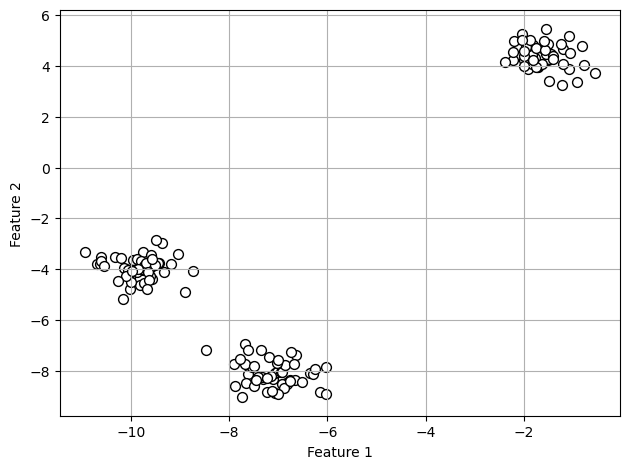

In [2]:
import matplotlib.pyplot as plt 
plt.scatter(
    X[:, 0], 
    X[:, 1], 
    c='white', 
    marker = 'o', 
    edgecolors= 'black', 
    s=50
) 
plt.xlabel('Feature 1') 
plt.ylabel('Feature 2') 
plt.grid() 
plt.tight_layout() 
plt.show()

## using K-means class from scikit-learn's cluster model 

In [3]:
from sklearn.cluster import KMeans 
km = KMeans(
    n_clusters=3, 
    init='random', 
    max_iter=300, 
    tol=1e-04,  #当前簇中心和上次簇中心的移动距离
    random_state=1
)
y_km =km.fit_predict(X)

D:\Anaconda\Lib\site-packages\sklearn\cluster\_kmeans.py:1419: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


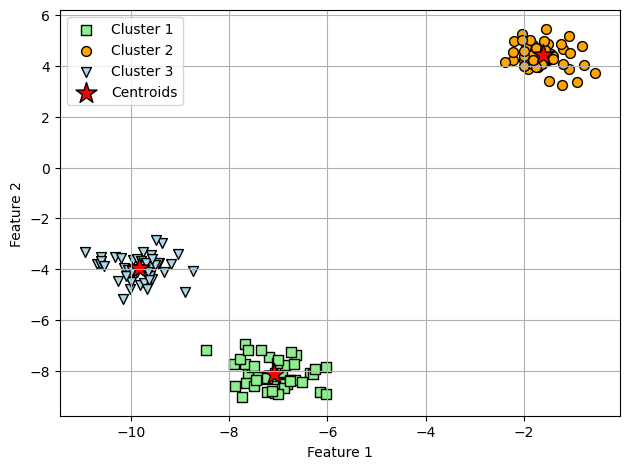

In [4]:
import matplotlib.pyplot as plt

plt.scatter(X[y_km == 0, 0], X[y_km == 0, 1],
            s=50, c='lightgreen', marker='s',
            edgecolor='black', label='Cluster 1')

plt.scatter(X[y_km == 1, 0], X[y_km == 1, 1],
            s=50, c='orange', marker='o',
            edgecolor='black', label='Cluster 2')

plt.scatter(X[y_km == 2, 0], X[y_km == 2, 1],
            s=50, c='lightblue', marker='v',
            edgecolor='black', label='Cluster 3')


plt.scatter(km.cluster_centers_[:, 0], km.cluster_centers_[:, 1],
            s=250, c='red', marker='*',
            edgecolor='black', label='Centroids')


plt.xlabel('Feature 1')
plt.ylabel('Feature 2')
plt.legend(scatterpoints=1)
plt.grid()
plt.tight_layout()
plt.show()


In [5]:
print(f'Distortion:{km.inertia_:.2f}')

Distortion:66.57


D:\Anaconda\Lib\site-packages\sklearn\cluster\_kmeans.py:1419: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
D:\Anaconda\Lib\site-packages\sklearn\cluster\_kmeans.py:1419: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
D:\Anaconda\Lib\site-packages\sklearn\cluster\_kmeans.py:1419: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
D:\Anaconda\Lib\site-packages\sklearn\cluster\_kmeans.py:1419: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than availabl

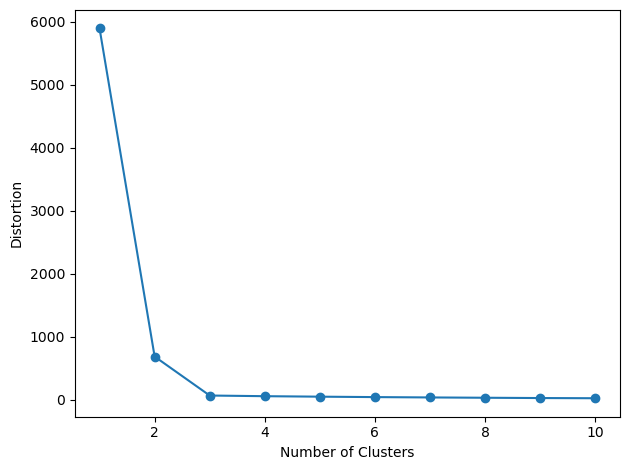

In [6]:
distortions =[] 

for i in range(1, 11): 
    km = KMeans(
        n_clusters = i, 
        init = 'k-means++', 
        n_init =10, 
        max_iter = 300, 
        random_state = 0
    ) 
    km.fit(X) 
    distortions.append(km.inertia_) 

plt.plot(range(1, 11), distortions, marker='o') 
plt.xlabel('Number of Clusters') 
plt.ylabel('Distortion') 
plt.tight_layout() 
plt.show()

# silhouette samples 

D:\Anaconda\Lib\site-packages\sklearn\cluster\_kmeans.py:1419: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


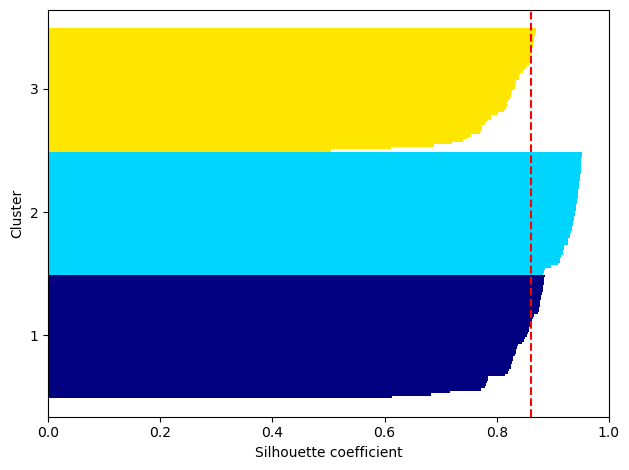

In [7]:
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_samples
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.cm as cm

# 训练模型
km = KMeans(
    n_clusters=3,
    init='k-means++',
    n_init=10,
    max_iter=300,
    tol=1e-04,
    random_state=0
)
y_km = km.fit_predict(X)

# 唯一的类别标签
cluster_labels = np.unique(y_km)
n_clusters = cluster_labels.shape[0]

# 计算每个样本的 silhouette 系数
silhouette_vals = silhouette_samples(X, y_km, metric='euclidean')

# 设置图形坐标轴位置
y_ax_lower, y_ax_upper = 0, 0
yticks = []

# 遍历每个簇
for i, c in enumerate(cluster_labels):
    c_silhouette_vals = silhouette_vals[y_km == c]
    c_silhouette_vals.sort()
    y_ax_upper += len(c_silhouette_vals)

    color = cm.jet(float(i) / n_clusters)
    plt.barh(
        range(y_ax_lower, y_ax_upper),
        c_silhouette_vals,
        height=1.0,
        edgecolor='none',
        color=color
    )
    
    yticks.append((y_ax_lower + y_ax_upper) / 2.)
    y_ax_lower += len(c_silhouette_vals)

# 绘制平均值虚线
silhouette_avg = np.mean(silhouette_vals)
plt.axvline(silhouette_avg, color="red", linestyle="--")

# 添加坐标轴标签和刻度
plt.yticks(yticks, cluster_labels + 1)
plt.ylabel('Cluster')
plt.xlabel('Silhouette coefficient')
plt.tight_layout()
plt.show()


## Bad Clustering 

D:\Anaconda\Lib\site-packages\sklearn\cluster\_kmeans.py:1419: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


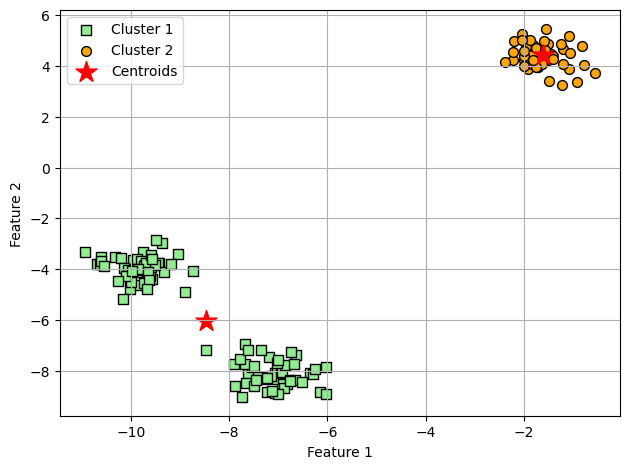

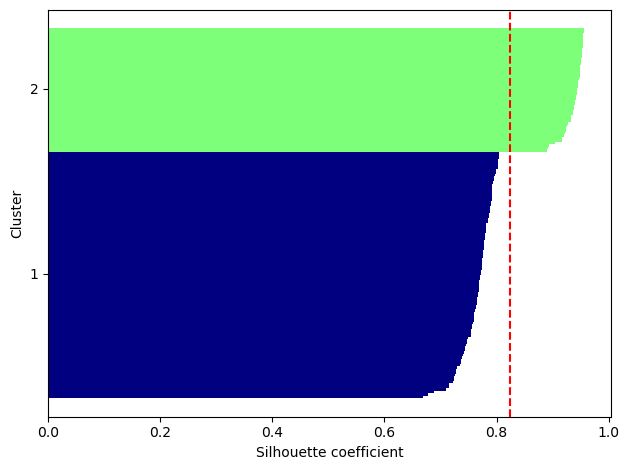

In [8]:
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_samples
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.cm as cm

# Step 1: KMeans clustering
km = KMeans(
    n_clusters=2,
    init='k-means++',
    n_init=10,
    max_iter=300,
    tol=1e-04,
    random_state=0
)
y_km = km.fit_predict(X)

# Step 2: Scatter plot of clustered points and centroids
plt.scatter(X[y_km == 0, 0], X[y_km == 0, 1], s=50, c='lightgreen', edgecolor='black', marker='s', label='Cluster 1')
plt.scatter(X[y_km == 1, 0], X[y_km == 1, 1], s=50, c='orange', edgecolor='black', marker='o', label='Cluster 2')
plt.scatter(km.cluster_centers_[:, 0], km.cluster_centers_[:, 1], s=250, c='red', marker='*', label='Centroids')

plt.xlabel('Feature 1')
plt.ylabel('Feature 2')
plt.legend()
plt.grid()
plt.tight_layout()
plt.show()

# Step 3: Silhouette plot
cluster_labels = np.unique(y_km)
n_clusters = cluster_labels.shape[0]
silhouette_vals = silhouette_samples(X, y_km, metric='euclidean')

y_ax_lower, y_ax_upper = 0, 0
yticks = []

for i, c in enumerate(cluster_labels):
    c_silhouette_vals = silhouette_vals[y_km == c]
    c_silhouette_vals.sort()
    y_ax_upper += len(c_silhouette_vals)
    color = cm.jet(float(i) / n_clusters)
    plt.barh(
        range(y_ax_lower, y_ax_upper),
        c_silhouette_vals,
        height=1.0,
        edgecolor='none',
        color=color
    )
    yticks.append((y_ax_lower + y_ax_upper) / 2.)
    y_ax_lower += len(c_silhouette_vals)

silhouette_avg = np.mean(silhouette_vals)
plt.axvline(silhouette_avg, color="red", linestyle="--")
plt.yticks(yticks, cluster_labels + 1)
plt.ylabel('Cluster')
plt.xlabel('Silhouette coefficient')
plt.tight_layout()
plt.show()
